In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = (10, 7)

import pandas as pd
pd.set_option('max_columns', 40)
pd.set_option('max_rows', 20)
pd.set_option('precision', 3)

In [6]:
housing = pd.read_csv('housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.325,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.301,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.257,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.846,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


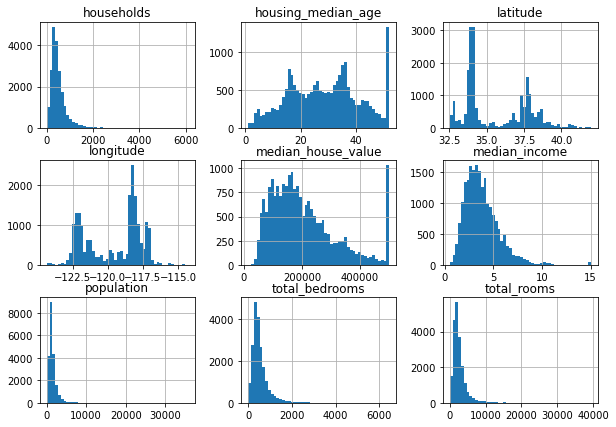

In [12]:
housing.hist(bins=50);

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
housing['income_cat'] = pd.cut(housing.median_income,
                               bins=[0., 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set.income_cat.value_counts() / len(strat_test_set)

3    0.351
2    0.319
4    0.176
5    0.115
1    0.040
Name: income_cat, dtype: float64

In [25]:
for set_ in [strat_test_set, strat_train_set]:
    set_.drop('income_cat', axis=1, inplace=True)

In [26]:
housing = strat_train_set.copy()

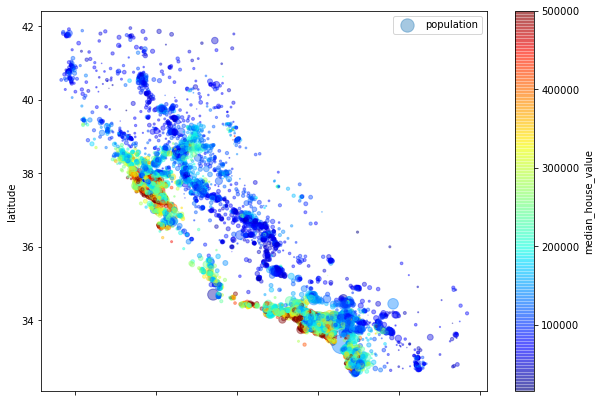

In [33]:
housing.plot(x='longitude',
             y='latitude',
             kind='scatter',
             alpha=0.4,
             s=housing.population / 100,
             label='population',
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)

In [34]:
corr_matrix = housing.corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.924,-0.106,0.049,0.077,0.108,0.063,-0.020,-0.047
latitude,-0.924,1.000,0.006,-0.039,-0.072,-0.115,-0.078,-0.075,-0.143
housing_median_age,-0.106,0.006,1.000,-0.365,-0.325,-0.299,-0.306,-0.111,0.114
total_rooms,0.049,-0.039,-0.365,1.000,0.929,0.855,0.918,0.200,0.135
total_bedrooms,0.077,-0.072,-0.325,0.929,1.000,0.876,0.980,-0.010,0.048
population,0.108,-0.115,-0.299,0.855,0.876,1.000,0.905,0.002,-0.027
households,0.063,-0.078,-0.306,0.918,0.980,0.905,1.000,0.011,0.065
median_income,-0.020,-0.075,-0.111,0.200,-0.010,0.002,0.011,1.000,0.687
median_house_value,-0.047,-0.143,0.114,0.135,0.048,-0.027,0.065,0.687,1.000


In [35]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000
median_income         0.687
total_rooms           0.135
housing_median_age    0.114
households            0.065
total_bedrooms        0.048
population           -0.027
longitude            -0.047
latitude             -0.143
Name: median_house_value, dtype: float64

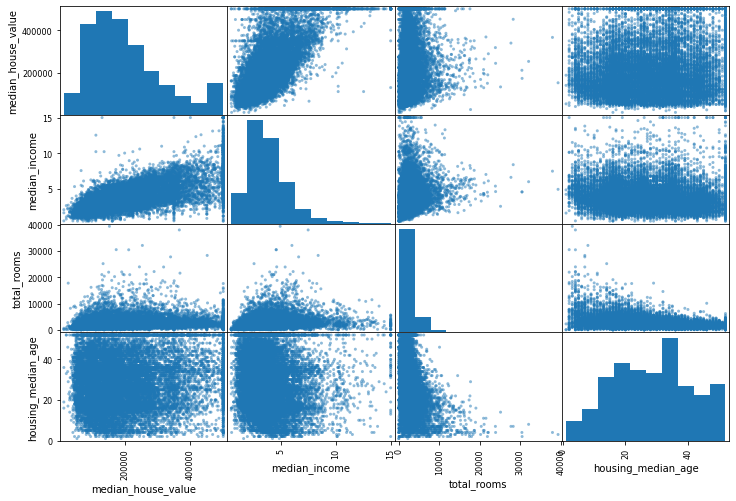

In [41]:
from pandas.plotting import scatter_matrix

attibutes = [
    'median_house_value', 'median_income', 'total_rooms', 'housing_median_age'
]

scatter_matrix(housing[attibutes], figsize=(12, 8));

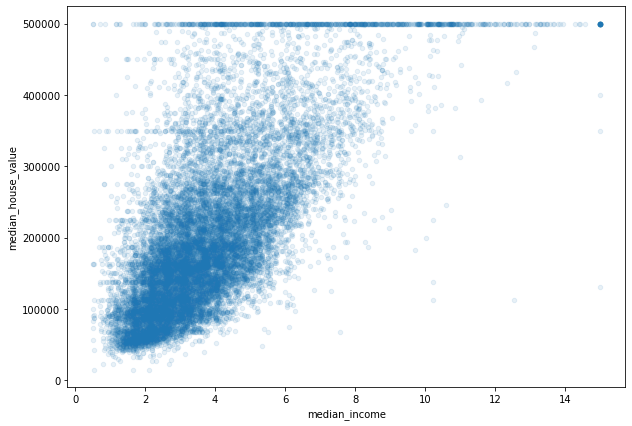

In [43]:
plt.scatter(housing.median_income, housing.median_house_value, alpha=0.1)

In [45]:
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.population / housing.households

In [46]:
corr_matrix = housing.corr()

corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000
median_income               0.687
rooms_per_household         0.146
total_rooms                 0.135
housing_median_age          0.114
households                  0.065
total_bedrooms              0.048
population_per_household   -0.022
population                 -0.027
longitude                  -0.047
latitude                   -0.143
bedrooms_per_room          -0.260
Name: median_house_value, dtype: float64

In [69]:
import ppscore as pps

columns = housing.columns.tolist()
columns.remove('ocean_proximity')

pps_matrix = pps.matrix(housing[columns])
pps_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000
median_income               0.112
population_per_household    0.000
bedrooms_per_room           0.000
rooms_per_household         0.000
households                  0.000
population                  0.000
total_bedrooms              0.000
total_rooms                 0.000
housing_median_age          0.000
latitude                    0.000
longitude                   0.000
Name: median_house_value, dtype: float64